# Using the Support Vector Machine and Multi-layer Perceptron algorithms and the Data_Glioblastoma5Patients_SC.csv database to evaluate classification performance with Parameter optimization

# 1. The Support Vector Machine Algorithm

In [1]:
# All necessary Imports
# libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
#Classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import export_graphviz
import graphviz

In [2]:
from time import time

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import seaborn as sns; sns.set() 
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import re
from numpy import random
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


training_data = pd.read_csv('Data_Glioblastoma5Patients_SC.csv')

In [3]:
training_data.head(10)

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3,Classes
0,-3.80147,-3.889900,-3.985616,2.651558,2.170748,-2.550822,4.807330,3.961170,-0.192665,3.614482,...,2.909466,-3.118284,-1.538324,-1.550699,-1.558581,-1.920271,3.007439,-2.509017,-2.149696,Class1
1,-3.80147,-3.889900,-3.158708,2.358992,-6.041792,-0.056092,3.606735,-2.632250,2.249388,6.857517,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,2.539560,2.164481,-2.149696,Class1
2,-3.80147,-3.889900,1.733125,-5.820241,-6.041792,-0.576957,-2.473517,-4.354127,0.063178,-2.570976,...,-1.821098,5.521892,-1.538324,-1.550699,-1.558581,0.174665,-0.165409,0.734268,-2.149696,Class1
3,-3.80147,-3.889900,-1.665669,3.514271,-6.041792,-3.699171,4.509461,-4.354127,2.985972,-2.570976,...,4.952176,-0.854351,-1.538324,-1.550699,-1.558581,-3.068620,-1.884744,-2.509017,-2.149696,Class1
4,-3.80147,3.742495,-2.166992,-5.820241,2.094729,4.021873,5.535007,4.019633,2.560370,-2.570976,...,-1.821098,4.328808,-1.538324,7.021985,-1.558581,4.590946,-0.128456,-2.509017,-2.149696,Class1
5,-1.98770,-3.889900,4.691156,-4.006471,-3.449348,4.309767,4.002960,5.123457,0.341512,-2.570976,...,4.176419,-2.370500,-1.538324,-1.550699,-1.558581,-3.068620,-3.421540,-2.509017,-2.149696,Class1
6,-3.80147,-3.889900,2.656469,2.207608,-6.041792,4.235937,0.716257,-1.164354,2.630053,-2.570976,...,-1.821098,0.071490,-1.538324,5.651368,-1.558581,3.617386,1.384471,-2.509017,-2.149696,Class1
7,-3.80147,-3.889900,-1.914759,2.417820,3.162904,-3.699171,-2.473517,-4.354127,1.970206,-2.570976,...,-1.821098,3.615788,-1.538324,-1.550699,-1.558581,1.829214,5.237998,-2.509017,6.779879,Class1
8,-3.80147,-3.889900,0.483560,-5.820241,-6.041792,-3.699171,-2.473517,4.889074,-3.847544,-2.570976,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,-0.775154,1.953289,-2.149696,Class1
9,-3.80147,4.316243,1.828663,2.140173,-6.041792,3.721094,3.479903,-4.354127,-4.860593,-2.570976,...,-1.821098,-0.860025,0.841462,-1.550699,-1.558581,5.157919,4.710859,5.078266,4.977025,Class1


In [4]:
print(training_data.describe())

print(training_data.groupby('Classes').size())

                A2M          AAAS          AAK1          AAMP          AARS  \
count  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02   
mean  -5.116023e-11  9.069777e-11  1.627909e-11 -7.674580e-11 -8.139630e-11   
std    4.907659e+00  3.641663e+00  2.474651e+00  3.563029e+00  3.909578e+00   
min   -3.801470e+00 -3.889900e+00 -3.985616e+00 -5.820241e+00 -6.041792e+00   
25%   -3.801470e+00 -3.889900e+00 -1.871573e+00 -3.807913e+00 -4.560471e+00   
50%   -3.801470e+00  4.099148e-01 -3.150282e-01  1.746972e+00  1.776033e+00   
75%    4.943281e+00  3.711243e+00  2.002047e+00  2.686033e+00  3.116038e+00   
max    1.170195e+01  5.840230e+00  5.389576e+00  4.520579e+00  6.366184e+00   

             AARSD1         AASDH      AASDHPPT          AASS          AATF  \
count  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02   
mean  -1.302323e-10 -2.255812e-10 -2.325458e-12  5.814004e-11 -1.511620e-10   
std    3.317166e+00  2.883981e+00  3.759008e+00  3.

In [5]:
training_data.describe()

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSCAN30,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3
count,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,...,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02
mean,-5.116023e-11,9.069777e-11,1.627909e-11,-7.674580e-11,-8.139630e-11,-1.302323e-10,-2.255812e-10,-2.325458e-12,5.814004e-11,-1.511620e-10,...,2.209304e-10,-1.906982e-10,-3.953487e-11,-4.418642e-11,-1.651165e-10,1.906968e-10,-1.348836e-10,3.255803e-11,-2.023251e-10,-1.604656e-10
std,4.907659e+00,3.641663e+00,2.474651e+00,3.563029e+00,3.909578e+00,3.317166e+00,2.883981e+00,3.759008e+00,3.236368e+00,3.461157e+00,...,3.227682e+00,2.730348e+00,2.946168e+00,2.702606e+00,2.836726e+00,2.788284e+00,2.859633e+00,2.811249e+00,3.001418e+00,3.052755e+00
min,-3.801470e+00,-3.889900e+00,-3.985616e+00,-5.820241e+00,-6.041792e+00,-3.699171e+00,-2.473517e+00,-4.354127e+00,-6.493931e+00,-2.570976e+00,...,-2.593571e+00,-1.821098e+00,-3.118284e+00,-1.538324e+00,-1.550699e+00,-1.558581e+00,-3.068620e+00,-3.421540e+00,-2.509017e+00,-2.149696e+00
25%,-3.801470e+00,-3.889900e+00,-1.871573e+00,-3.807913e+00,-4.560471e+00,-3.699171e+00,-2.473517e+00,-4.354127e+00,-1.967954e+00,-2.570976e+00,...,-2.593571e+00,-1.821098e+00,-3.118284e+00,-1.538324e+00,-1.550699e+00,-1.558581e+00,-3.068620e+00,-2.423300e+00,-2.509017e+00,-2.149696e+00
50%,-3.801470e+00,4.099148e-01,-3.150282e-01,1.746972e+00,1.776033e+00,1.097698e-01,-2.473517e+00,1.255356e+00,1.192040e+00,-2.570976e+00,...,-2.593571e+00,-1.821098e+00,-8.136609e-01,-1.538324e+00,-1.550699e+00,-1.558581e+00,-8.339072e-01,-4.421617e-01,-2.509017e+00,-2.149696e+00
75%,4.943281e+00,3.711243e+00,2.002047e+00,2.686033e+00,3.116038e+00,3.238343e+00,2.622538e+00,3.553135e+00,2.261182e+00,3.911515e+00,...,3.196094e+00,2.038805e+00,2.848862e+00,8.320662e-01,-1.687454e-01,3.335339e-01,2.459752e+00,2.514619e+00,2.939355e+00,2.228821e+00
max,1.170195e+01,5.840230e+00,5.389576e+00,4.520579e+00,6.366184e+00,6.012985e+00,6.798128e+00,5.729251e+00,4.324112e+00,6.992394e+00,...,7.499714e+00,7.931653e+00,6.105923e+00,8.186486e+00,8.073628e+00,7.998381e+00,5.950488e+00,6.703674e+00,6.918941e+00,8.064823e+00


In [6]:
# Obtain the class distribution
training_data.Classes.value_counts()

Class1    118
Class2     94
Class3     75
Class4     73
Class5     70
Name: Classes, dtype: int64

Solving the imbalance data that we have using upsampling technique

In [7]:
from sklearn.utils import resample
#Upsampling all the minorities classes to the equal
#value of the majority class i.e. sample ='118'

training_data_class1 = resample(training_data[training_data['Classes']=='Class1'],
               replace=True,
               n_samples=118,
               random_state=123)

training_data_class2 = resample(training_data[training_data['Classes']=='Class2'],
               replace=True,
               n_samples=118,
               random_state=123)

training_data_class3 = resample(training_data[training_data['Classes']=='Class3'],
               replace=True,
               n_samples=118,
               random_state=123)

training_data_class4 = resample(training_data[training_data['Classes']=='Class4'],
               replace=True,
               n_samples=118,
               random_state=123)

training_data_class5 = resample(training_data[training_data['Classes']=='Class5'],
               replace=True,
               n_samples=118,
               random_state=123)


training_data_upsampled = pd.concat([training_data_class1, training_data_class2, training_data_class3, training_data_class4, training_data_class5])


# Display new class counts

training_data_upsampled.Classes.value_counts()

Class1    118
Class2    118
Class3    118
Class4    118
Class5    118
Name: Classes, dtype: int64

In [8]:
feature_vectors = training_data_upsampled.drop(['Classes'], axis=1)
labels = training_data.columns[-1]
correct_Classes_labels = training_data_upsampled[labels].values

In [9]:
print(f'Feature Columns: {", ".join(feature_vectors)}\nLabel Column: {labels}')

Feature Columns: A2M, AAAS, AAK1, AAMP, AARS, AARSD1, AASDH, AASDHPPT, AASS, AATF, ABAT, ABCA1, ABCA8, ABCB6, ABCC3, ABCC5, ABCC9, ABCD2, ABCD3, ABCD4, ABCE1, ABCF2, ABCF3, ABHD2, ABHD4, ABHD5, ABHD14B, ABI1, ABI2, ABL2, ABLIM1, ABR, ABT1, ACAA2, ACACA, ACAD8, ACAD9, ACAD10, ACAD11, ACADM, ACADSB, ACAP2, ACAT1, ACAT2, ACBD5, ACBD6, ACER3, ACIN1, ACLY, ACN9, ACO1, ACO2, ACOT7, ACOT8, ACOT9, ACOT13, ACOX1, ACOX2, ACOX3, ACP1, ACP2, ACP6, ACPL2, ACSBG1, ACSL3, ACSL4, ACSL6, ACSS3, ACTA2, ACTB, ACTG1, ACTG1P4, ACTL6A, ACTN1, ACTR1A, ACTR2, ACTR8, ACTR10, ACVR2A, ACY1, ADAL, ADAM9, ADAM10, ADAM17, ADAM19, ADAM22, ADAMTS9, ADAMTSL3, ADAR, ADAT1, ADCK3, ADCY2, ADCYAP1R1, ADD1, ADD3, ADH5, ADI1, ADK, ADM, ADNP, ADRM1, ADSL, AEBP2, AEN, AFF1, AFF4, AFTPH, AGA, AGBL5, AGFG1, AGK, AGL, AGMO, AGPAT4, AGPAT5, AGPAT6, AGT, AGTRAP, AHCTF1, AHCY, AHCYL1, AHCYL2, AHI1, AHSA1, AIF1L, AIFM1, AIG1, AIMP1, AIMP2, AIP, AK1, AK2, AK3, AK4, AKAP2, AKAP6, AKAP7, AKAP8, AKAP8L, AKAP9, AKAP11, AKAP12, AKAP13, AK

We have balanced the unbalanced data using upsampling technique to raise the accuracy rate.

In [10]:
feature_vectors = training_data_upsampled.drop(['Classes'], axis=1)
feature_vectors.describe()

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSCAN30,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,...,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.205627,-0.116897,0.001466,0.223798,0.010959,0.018469,0.023276,-0.250638,0.139766,0.033277,...,-0.025268,0.186609,0.235008,0.155087,-0.026475,-0.036619,0.054481,-0.067603,-0.048767,0.057477
std,4.984240,3.558080,2.467432,3.466216,3.920526,3.315664,2.868191,3.760208,3.142106,3.446981,...,3.189586,2.860528,2.916997,2.797204,2.715021,2.722086,2.844525,2.715463,2.976018,3.092062
min,-3.801470,-3.889900,-3.985616,-5.820241,-6.041792,-3.699171,-2.473517,-4.354127,-6.493931,-2.570976,...,-2.593571,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,-3.421540,-2.509017,-2.149696
25%,-3.801470,-3.889900,-1.843209,-2.188106,-4.606417,-3.699171,-2.473517,-4.354127,-0.793829,-2.570976,...,-2.593571,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,-2.409753,-2.509017,-2.149696
50%,-2.853176,-0.264006,-0.351573,1.870889,1.773801,0.351765,-1.735062,0.785392,1.269422,-2.570976,...,-2.593571,-1.821098,0.080662,-1.538324,-1.550699,-1.558581,-0.718933,-0.588111,-2.509017,-2.149696
75%,5.555127,3.453448,2.216742,2.712138,3.116038,3.191942,2.617907,3.372707,2.261893,4.001834,...,3.249708,2.743173,2.932094,1.411443,0.687931,0.331513,2.578540,2.052431,2.939355,2.228821
max,11.701954,5.840230,5.389576,4.520579,6.366184,6.012985,6.798128,5.729251,4.324112,6.992394,...,6.830853,7.931653,6.053437,8.186486,8.073628,7.998381,5.950488,6.703674,6.918941,8.064823


In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, correct_Classes_labels, test_size=0.2, random_state=42)

In [12]:
from sklearn import svm

clf = svm.SVC(C=1000, gamma=0.01)

clf.fit(X_train,y_train)

predicted_labels = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell,)
    for label in labels:
        print ("%{0}s".format(columnwidth) % label,)
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1,)
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell,)
        print

conf = confusion_matrix(y_test, predicted_labels)

In [13]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('Classes classification accuracy = %f' % accuracy(conf))

Classes classification accuracy = 0.745763


In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

Accuracy: 0.7457627118644068
F1 score: 0.752123707861757
Recall: 0.7457627118644068
Precision: 0.87957181088314

 clasification report:
               precision    recall  f1-score   support

      Class1       0.47      1.00      0.64        27
      Class2       1.00      0.36      0.53        25
      Class3       1.00      0.81      0.89        21
      Class4       1.00      0.80      0.89        20
      Class5       1.00      0.76      0.86        25

    accuracy                           0.75       118
   macro avg       0.89      0.75      0.76       118
weighted avg       0.88      0.75      0.75       118


 confussion matrix:
 [[27  0  0  0  0]
 [16  9  0  0  0]
 [ 4  0 17  0  0]
 [ 4  0  0 16  0]
 [ 6  0  0  0 19]]


By randomly specified the parameters "C" and "Gamma" to "1000, 0.01" in order to control the training and CV errors we have got 75 % classification accurancy. So, in order to optimize this classification performance we need to find the best values of the parameters C and Gamma by selecting the least errors values out of a range of values for both "C" and "Gamma"

# Parameter Optimization

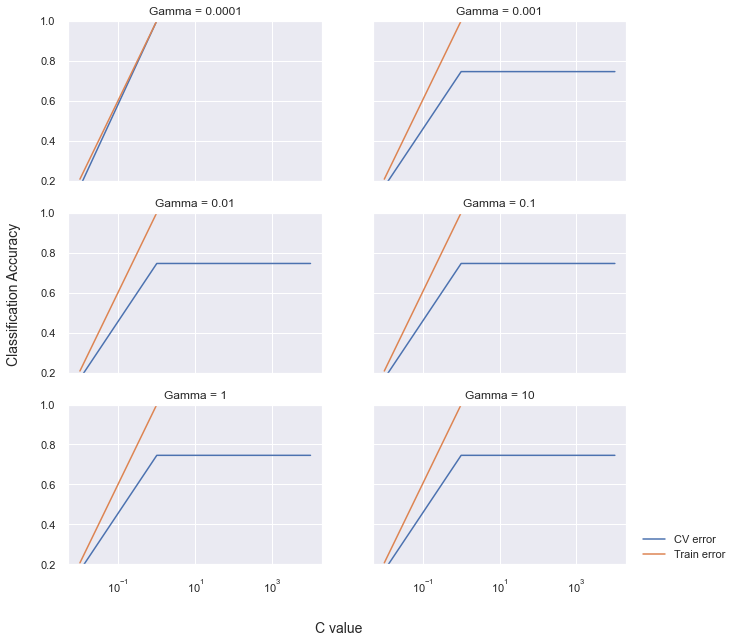

In [15]:
do_model_selection = True

if do_model_selection:
    C_range = np.array([.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000])
    gamma_range = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10])
    
    fig, axes = plt.subplots(3, 2,
                             sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0

    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):

            clf = svm.SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_train,y_train)

            train_conf = confusion_matrix(y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(y_test, clf.predict(X_test))
            
            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)
        
        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([0.2,1])

    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)
        
    fig.text(0.04, 0.5, 'Classification Accuracy', va='center',
                      rotation='vertical', fontsize=14)

In [16]:
clf = svm.SVC(C=5, gamma=0.0001)
clf.fit(X_train, y_train)

cv_conf = confusion_matrix(y_test, clf.predict(X_test))

print('Optimized Classes classification accuracy = %.2f' % accuracy(cv_conf))

Optimized Classes classification accuracy = 1.00


In [17]:
predicted_labels_rbf = clf.predict(X_test)

conf_rbf = confusion_matrix(y_test, predicted_labels_rbf)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels_rbf))
print ('F1 score:', f1_score(y_test, predicted_labels_rbf,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels_rbf,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels_rbf,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels_rbf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels_rbf))

Accuracy: 1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

      Class1       1.00      1.00      1.00        27
      Class2       1.00      1.00      1.00        25
      Class3       1.00      1.00      1.00        21
      Class4       1.00      1.00      1.00        20
      Class5       1.00      1.00      1.00        25

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118


 confussion matrix:
 [[27  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 25]]


By viewing the train and CV errors now we can say that the best values for the parameters "C" and "Gamma" are "5, 0.0001" and we have got 100 % classification accurancy between the unseen (test) data and the predicted classes. 

# 2. The Multi-Layer Perceptron Algorithm

# Preparing the Data

Our data is already upsampled to 118 samples per class so we don't have imbalance problem here.

In [18]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, correct_Classes_labels, test_size=0.2, random_state=42)

Here we are going to use the Atrtificial Neuronal Networks technique in order to estimate our classes classification. This technique is part of deep learning techniques and it is very popular for modeling and control the complex systems and it is widely used in Facial Recognition, Stock Market Prediction, Social Media, Signature Verification and Handwriting Analysis ...   

In [19]:
clf = MLPClassifier(solver='lbfgs', alpha=.1,
                    hidden_layer_sizes=(3))
clf.fit(X_train,y_train)
conf_te = confusion_matrix(y_test, clf.predict(X_test))

def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('Predicted accuracy: %.3f%%' % (100*accuracy(conf_te),))

predicted_labels = clf.predict(X_test)

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell),
    for label in labels:
        print ("%{0}s".format(columnwidth) % label),
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1),
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell),
        print

conf = confusion_matrix(y_test, predicted_labels)
# then print it in a pretty way
#print_cm(conf, patterns_labels)

print('Classification accuracy = %f' % accuracy(conf))

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

Predicted accuracy: 94.068%
Classification accuracy = 0.940678
Accuracy: 0.940677966101695
F1 score: 0.9407126411273544
Recall: 0.940677966101695
Precision: 0.9465153490577219

 clasification report:
               precision    recall  f1-score   support

      Class1       1.00      0.93      0.96        27
      Class2       0.91      0.80      0.85        25
      Class3       0.81      1.00      0.89        21
      Class4       1.00      1.00      1.00        20
      Class5       1.00      1.00      1.00        25

    accuracy                           0.94       118
   macro avg       0.94      0.95      0.94       118
weighted avg       0.95      0.94      0.94       118


 confussion matrix:
 [[25  2  0  0  0]
 [ 0 20  5  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 25]]


As we can see over here that with just 3 hidden layers we've got 97 % Classification accuracy and that because of the number of nodes (samples) in each layer, means if  we increase the number of hidden layers we will have more nodes and that leads to more learning of the input data with minimizing the error because of the backpropagation and the least square error algorithms that will continuously keep optimizing our model performance. 

In [20]:
clf = MLPClassifier(solver='lbfgs', alpha=.1,
                    hidden_layer_sizes=(7))
clf.fit(X_train,y_train)
conf_te = confusion_matrix(y_test, clf.predict(X_test))

def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('Predicted accuracy: %.3f%%' % (100*accuracy(conf_te),))

predicted_labels = clf.predict(X_test)

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell),
    for label in labels:
        print ("%{0}s".format(columnwidth) % label),
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1),
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell),
        print

conf = confusion_matrix(y_test, predicted_labels)
# then print it in a pretty way
#print_cm(conf, patterns_labels)

print('Classification accuracy = %f' % accuracy(conf))

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

Predicted accuracy: 100.000%
Classification accuracy = 1.000000
Accuracy: 1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

      Class1       1.00      1.00      1.00        27
      Class2       1.00      1.00      1.00        25
      Class3       1.00      1.00      1.00        21
      Class4       1.00      1.00      1.00        20
      Class5       1.00      1.00      1.00        25

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118


 confussion matrix:
 [[27  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 25]]


In [ ]:
As we can see over here that with just 7 hidden layers we've got 96 % Classification accuracy